<a href="https://colab.research.google.com/github/Kalhara02/Statistics-and-Machine-Learning/blob/main/Chapter%202_Individual%20Exercise%201_Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# Loading the Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# Dataset Size
df.shape

(20640, 9)

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
# Separate Features and Target
X = df.drop("target", axis=1)
y = df["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (20640, 8)
Target shape: (20640,)


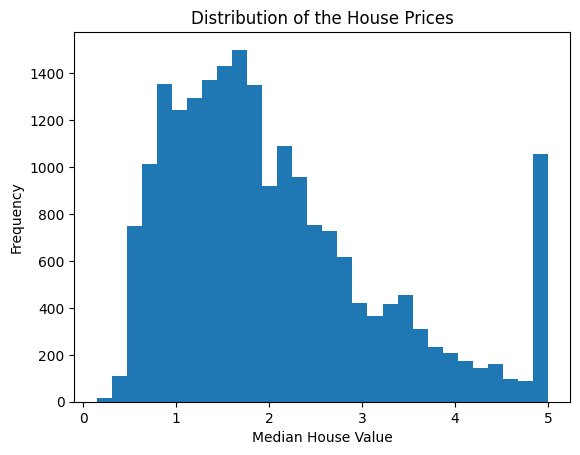

In [15]:
#Visualize Target Variables
plt.hist(y, bins=30)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of the House Prices")
plt.show()

In [13]:
# Split into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Decision Tree Performance
MSE: 0.5285224061284108
RMSE: 0.7269954649985176
R² Score: 0.600578011919574


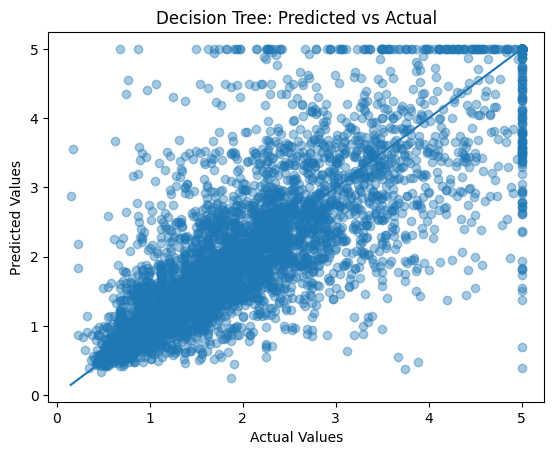

In [16]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Performance")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R² Score:", dt_r2)

plt.scatter(y_test, dt_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Predicted vs Actual")
plt.show()

Random Forest Performance
MSE: 0.2521291217466039
RMSE: 0.5021246077883496
R² Score: 0.8094576239469162


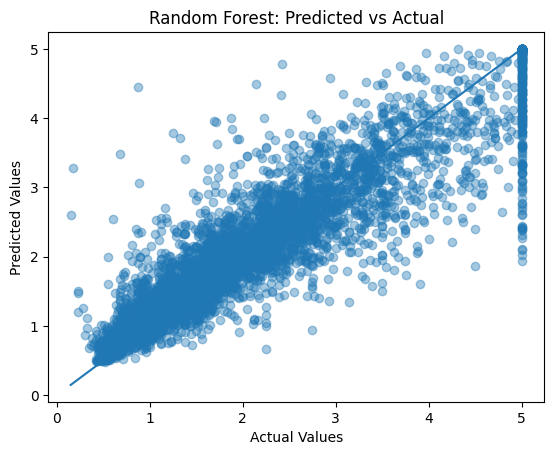

In [17]:
# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Performance")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)

plt.scatter(y_test, rf_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

Extra Trees Performance
MSE: 0.24881708188950033
RMSE: 0.4988156792739181
R² Score: 0.8119606427952875


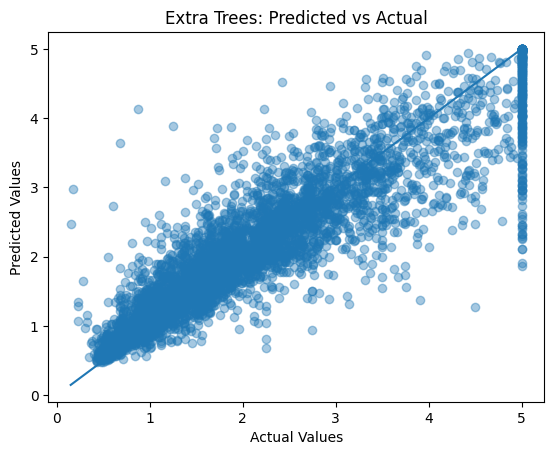

In [18]:
# Extra Trees Regressor
et = ExtraTreesRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
et.fit(X_train, y_train)

et_pred = et.predict(X_test)

et_mse = mean_squared_error(y_test, et_pred)
et_rmse = np.sqrt(et_mse)
et_r2 = r2_score(y_test, et_pred)

print("Extra Trees Performance")
print("MSE:", et_mse)
print("RMSE:", et_rmse)
print("R² Score:", et_r2)

plt.scatter(y_test, et_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Extra Trees: Predicted vs Actual")
plt.show()

In [ ]:
# The Decision Tree overfits and shows lower accuracy.
# Random Forest improves generalization by averaging multiple trees.
# Extra Trees introduces more randomness and gives the best overall performance.
# Ensemble methods clearly generalize better than a single decision tree on this real-world housing dataset.”